In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Modelos Lineales

Los ejemplos y la discusión que sigue está tomada del libro:

[*Introduction to Machine Learning with Python*](http://shop.oreilly.com/product/0636920030515.do)  
**Andreas C. Müller & Sarah Guido**  
O'Reilly 2017

Github con el material del libro: [Github](https://github.com/amueller/introduction_to_ml_with_python). 

El libro está accesible *online* desde la [Biblioteca de la Universidad de Sevilla](https://fama.us.es), como recurso electrónico.

**ATENCIÓN**: Antes que nada, cargamos el módulo `mglearn`, que se puede descargar del  [Github](https://github.com/amueller/introduction_to_ml_with_python) del libro anterior. Recordar que para que funcione la carga, debemos poner la carpeta `mglearn` en cualquiera de las carpetas que usa python para cargar sus módulos (normalmente, funcionará colocando la carpeta `mglearn` en la misma carpeta en la que se coloque este notebook. 

In [2]:
import mglearn

## PARTE 1: Regresión lineal

Cargamos en primer lugar el conjunto de datos `wave`, que viene definido en el módulo `mglearn`:

Text(0, 0.5, 'Target')

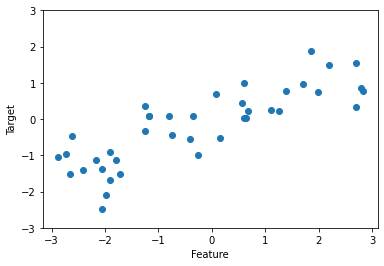

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

La siguiente función (implementada en el módulo `mglearn`) muestra gráficamente el resultado de hacer regresión lineal sobre ese conjunto de datos `wave`. Esta es no es una función de scikit_learn, tan solo es para que veamos gráficamente una recta de mínimos cuadrados. 

w[0]: 0.393906  b: -0.031804


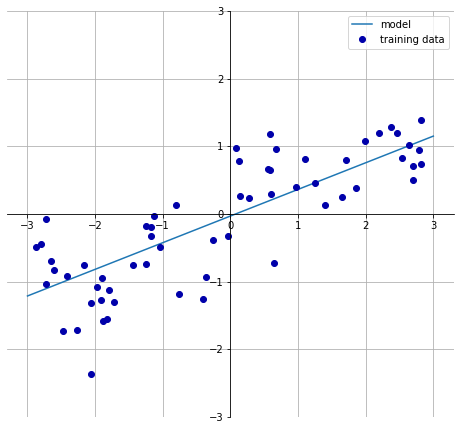

In [4]:
mglearn.plots.plot_linear_regression_wave()

Apliquemos ahora las herramientas de scikit_learn y lo aplicamos al conjunto de datos `wave` (en realidad el que aparece en el dibujo de ariba es una versión reducida con 40 ejemplos, ahora lo aplicamos a 60 ejemplos). Nótese cómo usamos el método de scikit_learn `LinearRegression` (que lleva a cabo el método de mínimos cuadrados):

In [5]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

Veamos el rendimiento de regresión lineal sobre el conjunto de entrenamiento y el de test.

In [6]:
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lr.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lr.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.67
Rendimiento sobre el conjunto de test: 0.66


Podemos incluso consultar los coeficientes (los pesos) de la recta que se ha encontrado:

In [7]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Rendimientos del 0.67 y 0.61 sobre entrenamiento y prueba no son muy buenos. En este caso claramente no hay sobreajuste porque el rendimiento sobre entrenamiento es bastante bajo. Lo que ocurre es que el modelo lineal es probablemente demasiado simple para que se ajuste mejor que eso a ese conjunto de datos unidimensional. En dimensiones superiores, los modelos lineales son más potentes, y sí que corren riesgo de sobreajuste.

Otro conjunto muy usado para ilustrar regresión es el del precio de la vivienda en Boston, en el que ya tenemos más atributos. En él se predice el precio de una vivienda en función de una serie de 13 atributos, como por ejemplo el número de habitaciones o determinados indicadores del barrio. Más detalles [aquí](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Filas y columnas de los datos: {}".format(boston.data.shape))

Filas y columnas de los datos: (506, 13)


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Aplicamos ahora regresión lineal sobre un conjunto mucho mayor (el del **precio de la vivienda en Boston**) en el que se han extendido a 104 las características (sólo 13 de ellas son originales, el resto se han derivado de esas 13 para conseguir artificialmente un conjunto de datos con un número alto de atributos). 

In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lr.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lr.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.95
Rendimiento sobre el conjunto de test: 0.61


Ahora sí que se produce un claro sobreajuste: alto rendimiento sobre elconjunto de entrenamiento,pero bastante bajo sobre el de test.

##### Regresión L2 (o  _ridge_)

Recordemos que en regresión _ridge_ se introduce un término de _regularización_: la suma de los cuadrados de los coeficientes ($\sum_i|w_i|^2$)  penaliza el modelo, dependiendo también de un coeficiente que indica el peso de dicha penalización. En scikit-learn, en el caso de regresión ese coeficiente es _alpha_. Cuanto mayor el coeficiente, más regularización. Por defecto es 1. 

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(ridge.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.89
Rendimiento sobre el conjunto de test: 0.75


Como se observa, al hacer regularización baja el rendimiento sobre el conjunto de entrenamiento, pero sube sobre el de test (ya que en principio estamos generalizando el modelo aprendido). Veamos qué pasa al variar el parámetro de regularización: 

In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(ridge10.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.79
Rendimiento sobre el conjunto de test: 0.64


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(ridge01.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.93
Rendimiento sobre el conjunto de test: 0.77


El siguiente gráfico nos muestra cómo cambian los distintos coeficientes $w_i$ dependiendo de la regularización que se use. Como se ve, a mayor regularización, los coeficientes son menores en magnitud:

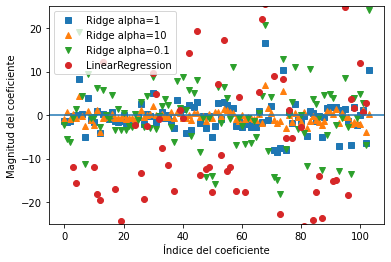

In [14]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Índice del coeficiente")
plt.ylabel("Magnitud del coeficiente")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Otra forma de entender la regularización es fijar _alpha_ pero variar el tamaño del conjunto de entrenamiento. En la siguiente gráfica, se va aumentando el tamaño del conjunto de entrenamiento, se aplica regresión lineal con y sin regularización, y vamos viendo cómo se comporta el modelo aprendido, tanto en el conjunto de entrenamiento, como en el de test:

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

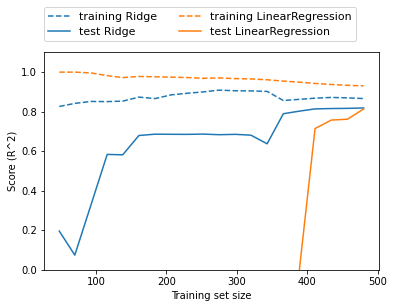

In [15]:
mglearn.plots.plot_ridge_n_samples()

Observaciones:

- Sobre el conjunto de entrenamiento, el rendimiento es mayor que sobre test
- Con regularización, el rendimiento es menor sobre entrenamiento, pero mayor sobre test
- Con menos datos y sin regularización, se aprende poco. A medida que aumentan los datos, la regularización influye menos

##### Lasso

En regresión _lasso_ (o con regularización $L_1$) el termino de regularización es la suma de los valores absolutos de los coeficientes ($\sum_i|w_i|$), penalización que también depende de un coeficiente _alpha_ que indica el peso de dicha penalización. Una de las consecuencias más interesantes de usar esta penalización es que algunos de los coeficientes $w_i$ se anulan. En los siguientes ejemplos, además de imprimir el rendimiento, vamos a imprimir también cuántos coeficientes son cero.   

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de coeficientes (pesos) no nulos: {}".format(np.sum(lasso.coef_ != 0)))

Rendimiento sobre el conjunto de entrenamiento: 0.29
Rendimiento sobre el conjunto de test: 0.21
Número de coeficientes (pesos) no nulos: 4


Se observa que el rendimiento es muy malo: demasiada regularización y se usan sólo cuatro características. Habrá que bajar el coeficiente alpha, que por defecto es 1:


In [17]:
# Se aumenta max_iter respecto del valor por defecto, 
# ya que si no da un warning de convergencia:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de coeficientes (pesos) no nulos: {}".format(np.sum(lasso001.coef_ != 0)))

Rendimiento sobre el conjunto de entrenamiento: 0.90
Rendimiento sobre el conjunto de test: 0.77
Número de coeficientes (pesos) no nulos: 33


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Número de coeficientes (pesos) no nulos: {}".format(np.sum(lasso00001.coef_ != 0)))

Rendimiento sobre el conjunto de entrenamiento: 0.95
Rendimiento sobre el conjunto de test: 0.64
Número de coeficientes (pesos) no nulos: 96


Se observa que con alpha igual a 0.01 la cosa va bastante bien, incluso algo mejor que con _ridge_, ya demás sólo se usan 33 de las 104. Sin embargo, bajar demasiado la regularización ha sido peor, parece ser que se sobreajusta. 

Podemos hacer también el experimento de ver cómo afecta la regularización lasso a la magnitud de los coeficientes aprendidos:

Text(0, 0.5, 'Magnitud del coeficiente')

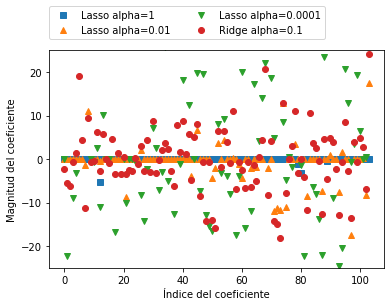

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Índice del coeficiente")
plt.ylabel("Magnitud del coeficiente")

Se observa que para `alpha=1`, la mayoría de los coeficientes son cero, y los que no son cero son pequeños. Con `alpha=0.01`, también hay muchos coeficientes que salen igual a cero. Al bajar la regularización a `alpha=0.0001`, ya practicamente todos los coeficientes son distintos de cero y en el modelo práctucamente no hay regularización. 

Los puntos rojos corresponden con regularización *ridge* para `alpha=0.1`, que hemos visto en rendimiento que es similar a *lasso* con `alpha=0.01`, sin embargo no se anulan tantos coeficientes. Aunque en general se prefiere *ridge* a *lasso*, si el objetivo es seleccionar características, porque se espera que algunas de ellas no sean relevantes, entonces es preferible usar regularización *lasso*.

## Parte 2: Clasificación con regresión logística

Dejamos ya los problemas de regresión y pasamos a ver problemas de clasificación. En concreto en esta sección usaremos  regresión logística con el conjunto de datos del cáncer de mama, que ya hemos visto en otemas anteriores. Recordemos que se trata de una base de datos con 30 características y 569 datos. 

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [21]:
cancer.data.shape

(569, 30)

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Dividimos el conjunto en entrenamiento y test:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)


Cargamos ahora la clase `LogisticRegression`, que implementa en scikit-learn regresión logística con regularización incorporada:

In [25]:
from sklearn.linear_model import LogisticRegression

**Atención**: En los modelos de clasificación que veremos en este módulo (regresión logística y SVM) la regularización se controla con una constante `C` que supone **el inverso de la cantidad de regularización**. Es decir: cuanto menor el valor de `C`, mayor regularización. 

Veamos el comportamiento de regresión logística con estos datos, usando la regularización que viene por defecto ($L_2$ o *ridge* con $C=1$):

In [26]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.944
Rendimiento sobre el conjunto de prueba: 0.958


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El rendimiento es bueno. Pero probablemente estamos "infraajustándonos", ya que el rendimiento en entrenamiento y prueba son similares. Bajamos la regularización (es decir, aumentamos el valor de `C`): 

In [27]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg100.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.948
Rendimiento sobre el conjunto de prueba: 0.958


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Parece que se confirma que el modelo que salía con la regularización por defecto era demasiado simple. Ahora hemos obtenido un rendimiento mejor sobre el conjunto de prueba, permitiendo una mayor complejidad del modelo (menos regularización)

¿Qué pasa si, por el contrario, hacemos más regularización? Pues que los resultados empeoran:

In [28]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg001.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.934
Rendimiento sobre el conjunto de prueba: 0.930


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como hicimos con regresión, podemos mostrar con una gráfica cómo afecta la regularización a los coeficientes que se aprenden para cada característica, pero ahora en el caso de los datos sobre el cáncer de mama:

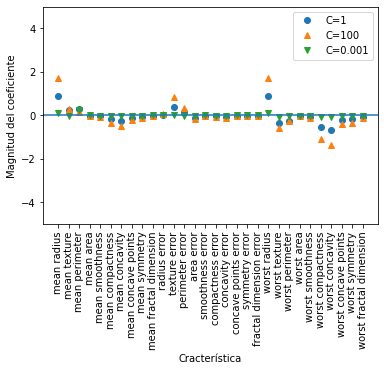

In [29]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Cracterística")
plt.ylabel("Magnitud del coeficiente")
plt.legend()

Veamos ahora el efecto de la regularización $L_1$ en regresión logística. Como se muestra en las imágenes, se anulan muchos de los coeficientes (más cuanto mayor es la regularización):

Rendimiento en conjunto de entrenamiento, regularización L1, C=0.001: 0.95
Rendimiento en conjunto de prueba, regularización L1,  C=0.001: 0.94
Rendimiento en conjunto de entrenamiento, regularización L1, C=1.000: 0.94
Rendimiento en conjunto de prueba, regularización L1,  C=1.000: 0.96
Rendimiento en conjunto de entrenamiento, regularización L1, C=100.000: 0.95
Rendimiento en conjunto de prueba, regularización L1,  C=100.000: 0.96


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

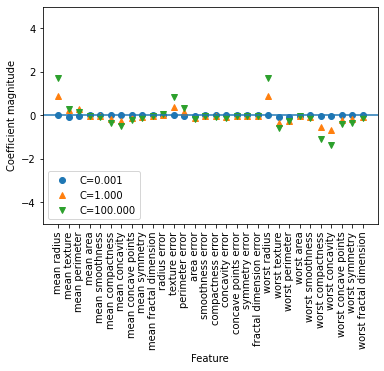

In [30]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    print("Rendimiento en conjunto de entrenamiento, regularización L1, C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Rendimiento en conjunto de prueba, regularización L1,  C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

## Parte 3: Clasificación múltiple con modelos lineales

De manera natural, por su propia definición, los clasificadores lineales son binarios. En scikit-learn, por defecto, la extensión a multiclase de estos clasificadores lineales se hace con el esquema "uno frente al resto" (*one vs rest*, también llamado *one vs all*) 

Ilustremos esto con el conjunto de datos siguiente, generado aleatoriamente por la función de scikit-learn llamada `make_blobs`. Es bidimensonal (dos características) y tiene tres posibles clases:

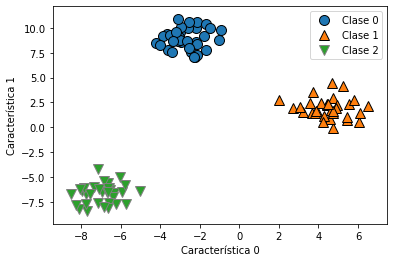

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.legend(["Clase 0", "Clase 1", "Clase 2"])

Aplicando `LogisticRegression` a este problema multiclase, se aplica *one vs rest*. Esto quiere decir que se aprenden tres clasificadores binarios: tres rectas que marcan la frontera de decisión de cada clase frente al resto, cada una con sus pesos correspondientes:

In [32]:
logreg_m = LogisticRegression().fit(X, y)
print("Dimensión de la matriz de coeficientes: ", logreg_m.coef_.shape)
print("Dimensión de los intercept: ", logreg_m.intercept_.shape)
print(logreg_m.coef_)
print(logreg_m.intercept_)

Dimensión de la matriz de coeficientes:  (3, 2)
Dimensión de los intercept:  (3,)
[[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]
[-1.63102014  1.85764971 -0.22662957]


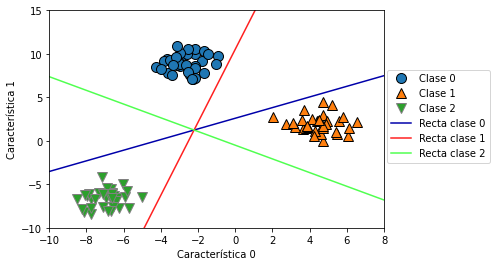

In [33]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logreg_m.coef_, logreg_m.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.legend(['Clase 0', 'Clase 1', 'Clase 2', 'Recta clase 0', 'Recta clase 1',
            'Recta clase 2'], loc=(1.01, 0.3))

El siguiente gráfico muestra, con colores, qué predicción se haría en cada punto del plano con el clasificador aprendido. Nótese que en la zona central (el triángulo que se forma con las tres rectas), los puntos no se clasifican positivamente para ninguna de las regiones. En esos casos, el esquema *one vs rest* hace que la predicción sea la de la recta más cercana al punto. 

Text(0, 0.5, 'Característica 1')

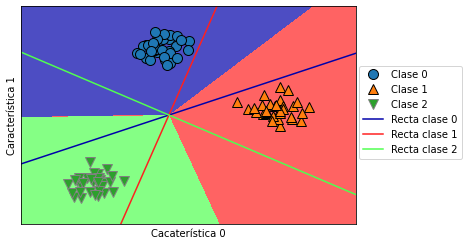

In [34]:
mglearn.plots.plot_2d_classification(logreg_m, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logreg_m.coef_, logreg_m.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Clase 0', 'Clase 1', 'Clase 2', 'Recta clase 0', 'Recta clase 1',
            'Recta clase 2'], loc=(1.01, 0.3))
plt.xlabel("Cacaterística 0")
plt.ylabel("Característica 1")

## Parte 4 Máquinas de vectores soporte

Lo que sigue trata de aplicar SVM lineal (sin kernel) a un conjunto de datos que se denomina *forge*, en el que hay **dos clases**. En scikit-learn, se implementa las máquinas de vectores soporte sin Kernel se aplican con la clase `LinearSVC`. 

Se incluyen a continuación gráfica con las *fronteras de decisión* que se ha aprendido al usar SVM, y se compara con la que se obtienes usando regresión logística: 

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


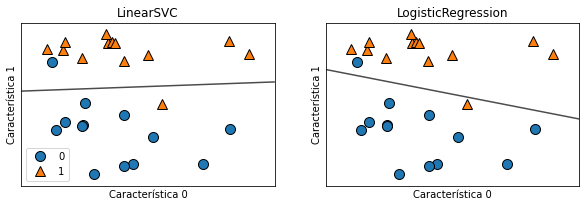

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Característica 0")
    ax.set_ylabel("Característica 1")
axes[0].legend()

En ambos casos, se aplica regularización $L_2$ por defecto, con coeficiente de regularización `C=1`. Recuérdese que este coeficiente representa el inverso de la cantidad de regularización. 

Lo que sigue es la gráfica de las fronteras de decisión que se aprenden con `LinearSVC`, con distintos valores de `C`:

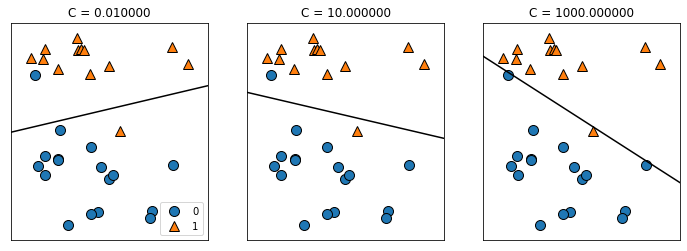

In [36]:
mglearn.plots.plot_linear_svc_regularization()

Como se observa, cuanto mayor es el valor de `C`, menos regularización y más trata el clasificador de ajustarse a **todos** los ejemplos. Cuanto menor es el valor, menos importante es clasificar bien todos los ejemplos, y más el encontrar un buen margen de separción. 

En la derecha tenemos mucha regularización: hay dos puntos mal clasificados, pero la línea es bastante horizontal. En la figura central bajamos la regularización, y eso hace que el modelo intente algo más el no tener errores en la clasificación. Finalmente, en la izquierda tenemos muy poca regularización: se consigue clasificar correctamente todos los círculos (y solo deja uno de los triángulos mal clasificado), pero no parece que la frontera de decisión capture bien la disposición de los puntos. 

### Un ejemplo de frontera de decisión no lineal

De nuevo con la función `make_blobs`, generamos aleatoriamente un conjunto de datos bidimensionales, con dos clases, en el que los datos se disponen alrededor de cuatro "centros", dos por cada clase:  

Text(0, 0.5, 'Característica 1')

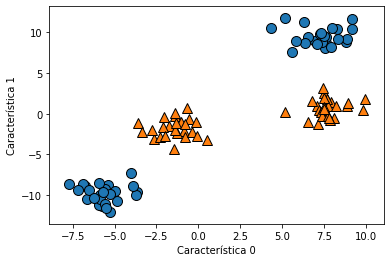

In [37]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

Está claro que un modelo puramente lineal se comportará difícilmente puede modelar este problema de clasificación, como podemos ver a continuación. Usemos `LinearSVC` y dibujemos la frontera de decisión que define el modelo:

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Característica 1')

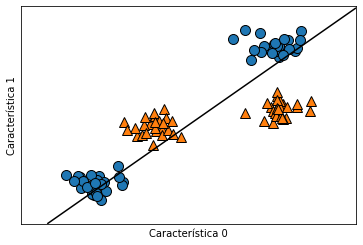

In [38]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

Sin embargo, veamos gráficamente qué ocurre si añadimos una tercera característica, obtenida simplemente como el cuadrado de la segunda característica del problema original. Para la representación gráfica usamos `Axes3D` de `matplotlib`:  

/var/folders/p8/zcs6h14j56x4_s1rhz058snw0000gn/T/ipykernel_1859/3570687659.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'caract1 ** 2')

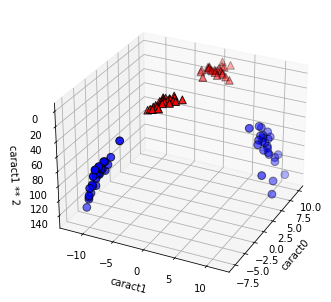

In [39]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("caract0")
ax.set_ylabel("caract1")
ax.set_zlabel("caract1 ** 2")

En este espacio tridimensional, el conjunto de datos aumentado sí que es linealmente separable. De hecho, podemos aplicar `LinearSVC`al conjunto de datos aumentado, y representar gráficamente el plano de separación que encuantra tras entrenar el modelo con estos datos aumentados:

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/p8/zcs6h14j56x4_s1rhz058snw0000gn/T/ipykernel_1859/3790981571.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'caract1 ** 2')

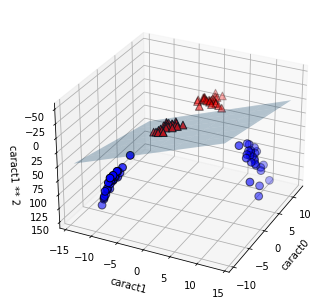

In [40]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("caract0")
ax.set_ylabel("caract1")
ax.set_zlabel("caract1 ** 2")

Podemos ahora representar en dos dimensiones (es decir, solo respecto de las características originales) las regiones de decisión que el clasificador ha encontrado. Como se observa, ya no están definidos mediante una línea recta, sino por algo elipsoidal:

Text(0, 0.5, 'Característica 1')

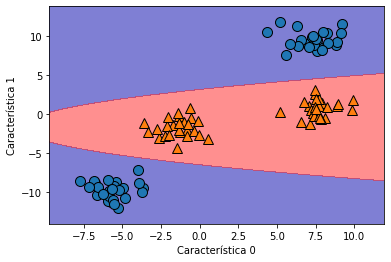

In [41]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

### Máquinas de vectores soporte con kernel

Como se ha visto, se abren nuevas perspectivas para los modeos líneales cuando se añaden más características, sumergiendo los datos originales es espacios de una mayor dimensión. Esto podría suponer un problema de eficiencia, pero el llamado "kernel trick" nos permite buscar un clasificador lineal (basado en máquines de vectores soporte) en en un espacio de mayores dimensiones, pero **sin usar explícitamente la nueva representación extendida** (ver detalles en las diapositivas).

En scikit-learn, las máquinas de vectores soporte con kernels están implementadas por la clase `SVC`

Creamos ahora un conjunto de datos bidimensionales con clasificación binaria, usando la función de `mglearn` llamada `make_handcrafted_dataset`:

Text(0, 0.5, 'Característica 1')

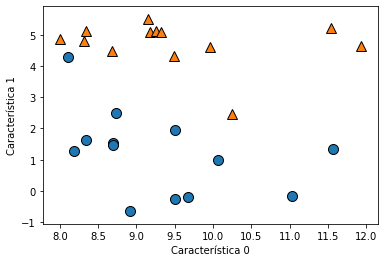

In [42]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

Entrenamos ahora usando `SVC`, con kernel gaussiano, anchura de kernel 0.1 (parámetro `gamma`) y regularización 10 (parámetro `C`). En la siguiente gráfica se ve la frontera de decisión encontrada, junto con los vectores soporte (remarcados en la gráfica). Los vectores soporte son aquellos ejemplos del conjunto de entrenamiento que marcan la frontera de decisión. Los *coeficientes duales* marcan la "importancia" de cada vector soporte a la hora de clasifucar nuevos ejemplos.  

Para clasificar un nuevo ejemplo, solo se usan los vectores soporte: se mide la "distancia" a cada vector soporte, y con esas distancias, teniendo en cuenta la importancia de cada uno de ellos, se realiza la predicción. En la gráfica se muestran también las dos regiones de decisión que se han aprendido: 

Text(0, 0.5, 'Característica 1')

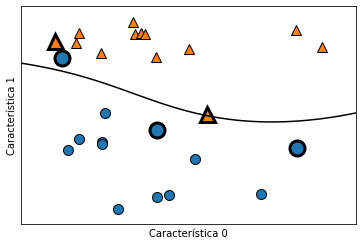

In [43]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
#print(sv)
# class labels of support vectors are given by the sign of the dual coefficients
#print(svm.dual_coef_.ravel())
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

#### Ajuste de (hiper)-parámetros en máquinas de vectores soporte

En general, las máquinas de vectores soporte son bastante sensibles a los posibles valores de los parámetros que se usen. Por ejemplo, veamos qué pasa cuando variamos los valores de los parámetros `C` y `gamma`. Para entender esto mejor, damos una intuición de lo que significa cada uno de ellos:

- Como en `LinearSVC`, el parámetro `C` indica la intensidad de la regularización. Cuanto mayor, menos regularización, y por tanto modelos más complejos, más ajustados al conjunto de entrenamiento. Cuanto menor, modelo más simples, menos sobreajuste pero también riesgo de ser demasiados simples y tener infraajuste. 

- El parámetro `gamma` es un parámetro específico del kernel de base radial: $K(v,w)=e^{(-\gamma\cdot||v-w||^2)}$. Es el inverso de la anchura del nucleo gaussiano,  y mide la importancia que tiene la distancia a cada ejemplo del conjunto de entrenamiento, a la hora de clasificar una nueva instancia. Cuanto más bajo el valor, más influencia. 

En la siguiente figura se observan distintos clasificadores aprendidos con distintas combinaciones de `C` y de `gamma`. De izquierda a derecha, se varía de mayor a menor radio del núcleo: mayor radio significa que muchos puntos se consideran "cerca", y esto hace que las fronteras de decisión sean más "suaves". De arriba a abajo se pasa de mayor a menor regularización, y por tanto va aumentenda la complejidad de la forntera aprendido. 

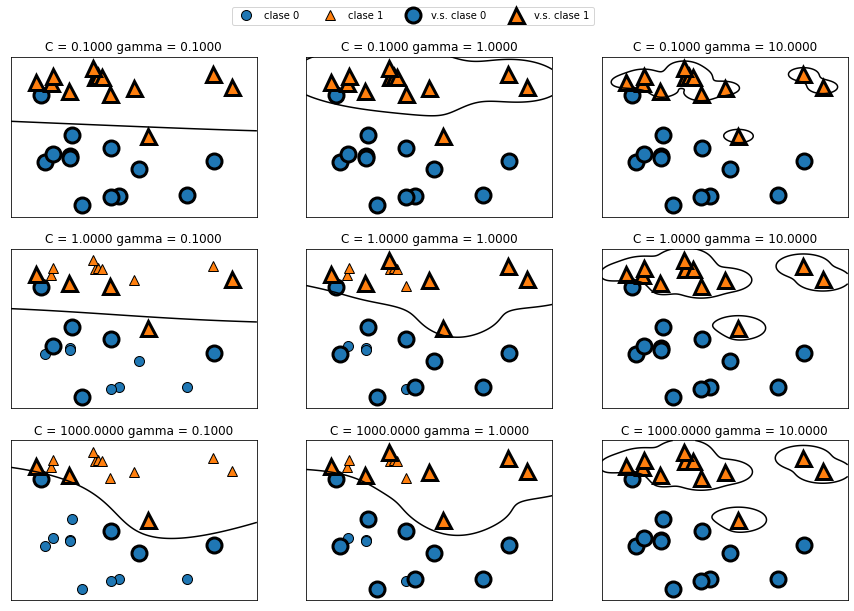

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["clase 0", "clase 1", "v.s. clase 0", "v.s. clase 1"],
                  ncol=4, loc=(.9, 1.2))

#### Aplicando `SVC` a los datos de cáncer de mama

Veamos qué pasa al aplicar maquinas de vectores soporte con kernel (con los parámetros por defecto) al conjunto de datos del cáncer:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(svc.score(X_train, y_train)))
print("Rendimiento sobre el cojunto de prueba: {:.2f}".format(svc.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.90
Rendimiento sobre el cojunto de prueba: 0.94


Como se observa, un rendimiento bastante malo sobre el conjunto de prueba. Las máquinas de vectores soporte son bastante sensibles a el ajuste de los hiperparámetros, y también **a la escala de los datos** y cada una de sus características. 

En la siguiente gráfica se observa en qué intervalo se mueven cada una de las características. Hay bastante diferencia entre las magnitides de cada una de ellas:

In [46]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Índice de la característica")
plt.ylabel("Magnitud de la característica")

TypeError: boxplot() got an unexpected keyword argument 'manage_xticks'

Para intentar paliar esta diferencia de escalado, podemos transformar los datos, haciendo que el rango de valores de cada característica sea el intervalo $[0,1]$. Para ello podemos usar 

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

print("Mínimo de cada característica\n{}".format(X_train_scaled.min(axis=0)))
print("Máximo de cada característica\n {}".format(X_train_scaled.max(axis=0)))

Mínimo de cada característica
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Máximo de cada característica
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Aplicamos **la misma transformación** al conjunto de test

In [48]:
X_test_scaled = scaler.transform(X_test)


Entrenamos con el conjuto de datos transformado, y comprobamos el rendimiento con el conjunto de prueba igualmente transformado.

In [49]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Rendimiento sobre conjunto de entrenamiento: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Rendimiento sobre conjunto de prueba: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Rendimiento sobre conjunto de entrenamiento: 0.984
Rendimiento sobre conjunto de prueba: 0.972


Bastante mejor. Pero aún se observa cierto infraajuste (sobre el entrenamiento se comporta peor que sobre el conjunto de prueba), así que podríamos ver qué pasa si aminoramos la regularización. Efectivamente se observa una mejora en el rendimiento:

In [50]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Rendimiento sobre conjunto de entrenamiento: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Rendimiento sobre conjunto de prueba: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Rendimiento sobre conjunto de entrenamiento: 1.000
Rendimiento sobre conjunto de prueba: 0.958
